In [ ]:
!pip install --quiet kaggle                 # install Kaggle API client
!mkdir -p ~/.kaggle                         # ensure hidden dir exists
!cp kaggle.json ~/.kaggle/                  # move token into place
!chmod 600 ~/.kaggle/kaggle.json            # secure your token file

In [ ]:
!kaggle datasets download mkechinov/ecommerce-behavior-data-from-multi-category-store --unzip

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
100% 4.28G/4.29G [00:48<00:00, 226MB/s]
100% 4.29G/4.29G [00:48<00:00, 94.2MB/s]


# EDA and Preprocessing

## Part 1

In [ ]:
# import pandas as pd

# # 1. Load the October 2019 data
# file_path = '/content/2019-Oct.csv'  # adjust path as needed in Colab or local
# df = pd.read_csv(file_path)

# # 2. Convert event_time to datetime and describe it
# df['event_time'] = pd.to_datetime(df['event_time'])
# print("## event_time Summary")
# print(df['event_time'].describe())

# # 3. DataFrame structure and memory usage
# print("\n## DataFrame Info")
# df.info()

# # 4. Basic summary statistics for all columns
# #    - describe() shows count, mean, std, min, 25%, 50%, 75%, max for numeric
# #    - and count, unique, top, freq for object columns
# print("\n## Descriptive Statistics (describe)")
# print(df.describe(include='all'))

# # 5. Detailed numeric summaries
# numeric_cols = df.select_dtypes(include='number').columns
# nums = df[numeric_cols]

# means   = nums.mean()
# medians = nums.median()
# stds    = nums.std()
# quantiles = nums.quantile([0.25, 0.5, 0.75])
# iqr     = quantiles.loc[0.75] - quantiles.loc[0.25]

# print("\n## Numeric Feature Summary")
# for col in numeric_cols:
#     print(f"\n### {col}")
#     print(f"Mean   : {means[col]:.4f}")
#     print(f"Median : {medians[col]:.4f}")
#     print(f"Std    : {stds[col]:.4f}")
#     print(f"25%    : {quantiles.loc[0.25, col]:.4f}")
#     print(f"50%    : {quantiles.loc[0.5,  col]:.4f}")
#     print(f"75%    : {quantiles.loc[0.75, col]:.4f}")
#     print(f"IQR    : {iqr[col]:.4f}")  # Q3 − Q1

# # 6. Categorical feature summaries
# cat_cols = df.select_dtypes(include=['object', 'category']).columns

# print("\n## Categorical Feature Summary")
# for col in cat_cols:
#     non_null = df[col].count()
#     unique   = df[col].nunique()
#     top_freq = df[col].value_counts().head(10)
#     print(f"\n### {col}")
#     print(f"Non-null count : {non_null}")
#     print(f"Unique values  : {unique}")
#     print("Top 10 values by frequency:")
#     print(top_freq.to_string())

KeyboardInterrupt: 

In [18]:
import pandas as pd

# -------------------------------
# CONFIGURATION
# -------------------------------
FILE_PATH    = '/content/2019-Oct.csv'  # adjust to your file location
PRELOAD_ROWS = 1_000_000                # rows to read before sampling
SAMPLE_FRAC  = 0.1                      # fraction to sample in-memory

# -------------------------------
# 1. Load a manageable chunk
# -------------------------------
df_preload = pd.read_csv(
    FILE_PATH,
    nrows=PRELOAD_ROWS,
    parse_dates=['event_time']
)

# -------------------------------
# 2. In-memory random sampling
# -------------------------------
df = df_preload.sample(frac=SAMPLE_FRAC, random_state=42)

# -------------------------------
# 3. event_time summary
# -------------------------------
print("## event_time Summary")
print(df['event_time'].describe())

# -------------------------------
# 4. DataFrame structure
# -------------------------------
print("\n## DataFrame Info")
df.info()

# -------------------------------
# 5. Overall descriptive stats
# -------------------------------
print("\n## Descriptive Statistics (describe)")
print(df.describe(include='all'))

# -------------------------------
# 6. Detailed numeric summary
# -------------------------------
numeric_cols = df.select_dtypes(include='number').columns
means       = df[numeric_cols].mean()
medians     = df[numeric_cols].median()
stds        = df[numeric_cols].std()
quantiles   = df[numeric_cols].quantile([0.25, 0.5, 0.75])
iqr         = quantiles.loc[0.75] - quantiles.loc[0.25]

print("\n## Numeric Feature Summary")
for col in numeric_cols:
    q25 = quantiles.at[0.25, col]
    q50 = quantiles.at[0.50, col]
    q75 = quantiles.at[0.75, col]
    print(f"\n### {col}")
    print(f"Mean   : {means[col]:.4f}")
    print(f"Median : {medians[col]:.4f}")
    print(f"Std    : {stds[col]:.4f}")
    print(f"25%    : {q25:.4f}")
    print(f"50%    : {q50:.4f}")
    print(f"75%    : {q75:.4f}")
    print(f"IQR    : {iqr[col]:.4f}")

# -------------------------------
# 7. Categorical feature summary
# -------------------------------
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("\n## Categorical Feature Summary")
for col in cat_cols:
    non_null = df[col].count()
    unique   = df[col].nunique()
    top10    = df[col].value_counts().head(10)
    print(f"\n### {col}")
    print(f"Non-null count : {non_null}")
    print(f"Unique values  : {unique}")
    print("Top 10 frequencies:")
    print(top10.to_string())

## event_time Summary
count                                 100000
mean     2019-10-01 10:20:21.281200128+00:00
min                2019-10-01 00:00:00+00:00
25%                2019-10-01 06:51:31+00:00
50%                2019-10-01 10:22:08+00:00
75%      2019-10-01 14:12:09.249999872+00:00
max                2019-10-01 16:56:07+00:00
Name: event_time, dtype: object

## DataFrame Info
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     100000 non-null  datetime64[ns, UTC]
 1   event_type     100000 non-null  object             
 2   product_id     100000 non-null  int64              
 3   category_id    100000 non-null  int64              
 4   category_code  67936 non-null   object             
 5   brand          85284 non-null   object             
 6   price          100000 non-null  float64  

Initial dataset shape: (100000, 9)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 987231 to 573083
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     100000 non-null  datetime64[ns, UTC]
 1   event_type     100000 non-null  object             
 2   product_id     100000 non-null  int64              
 3   category_id    100000 non-null  int64              
 4   category_code  67936 non-null   object             
 5   brand          85284 non-null   object             
 6   price          100000 non-null  float64            
 7   user_id        100000 non-null  int64              
 8   user_session   100000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 7.6+ MB
None
Data preview:
%s                       event_time event_type  product_id          category_id                category_code 

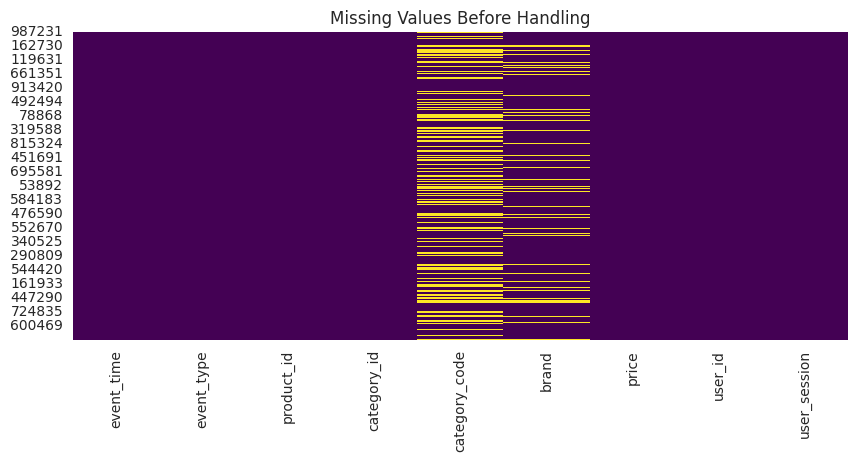

Missing % in brand & category_code:
 brand            0.14716
category_code    0.32064
dtype: float64
✅ Missing values handled.


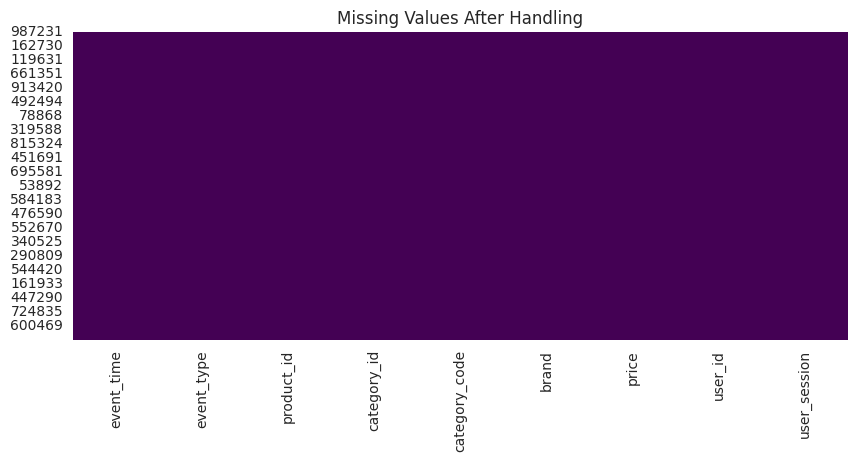

Found 6 duplicate rows.
✅ Duplicates removed.
✅ All sessions are sorted by event_time.
✅ Event type one-hot encoding completed.


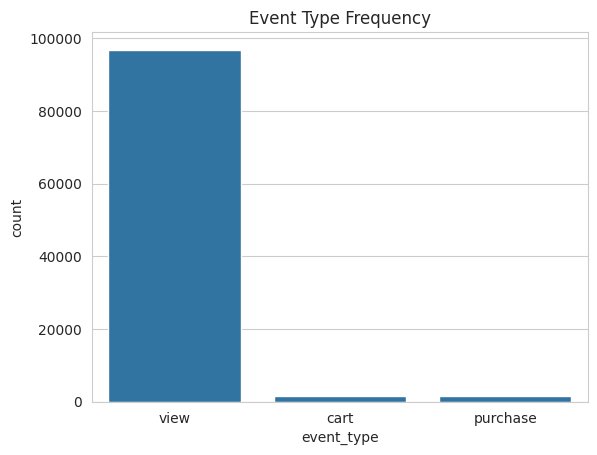

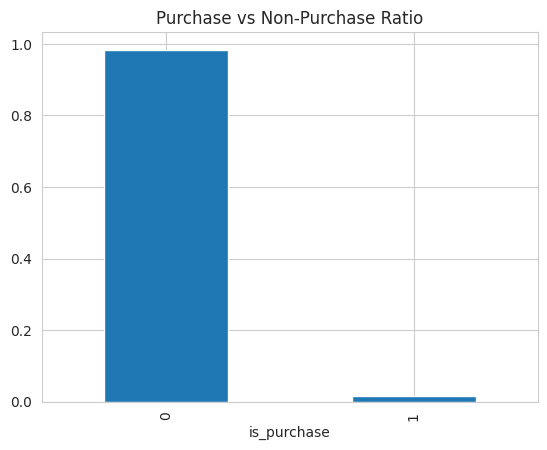

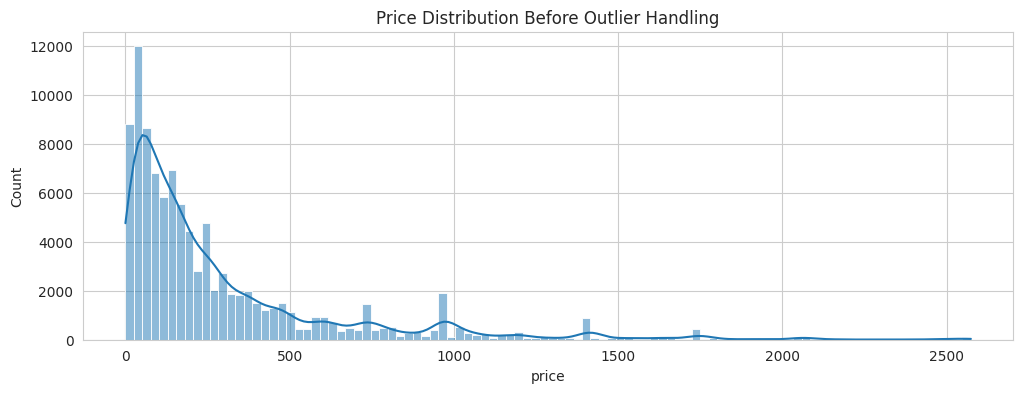

Price skewness: 2.48
Applied log1p to price.
Capped outliers in price_log to [1.61, 8.46].


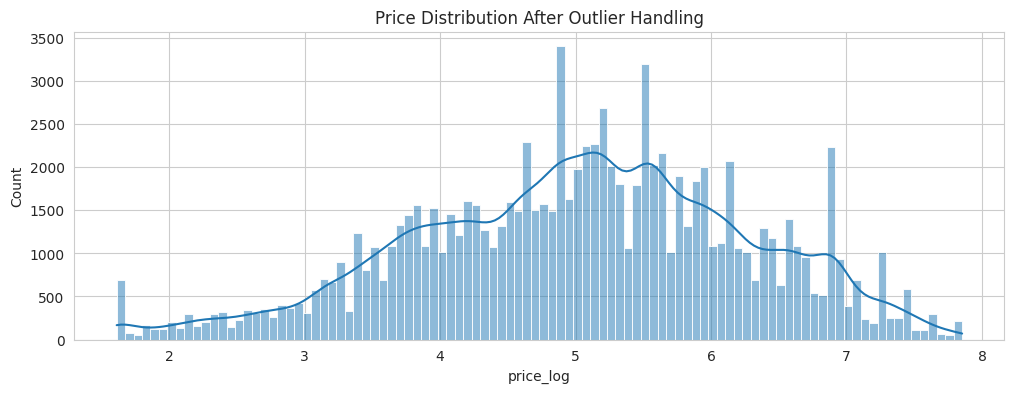

✅ Session duration feature added.
✅ Session-level aggregates added.
✅ PCA completed. Explained Variance: [0.4754967  0.24886596]


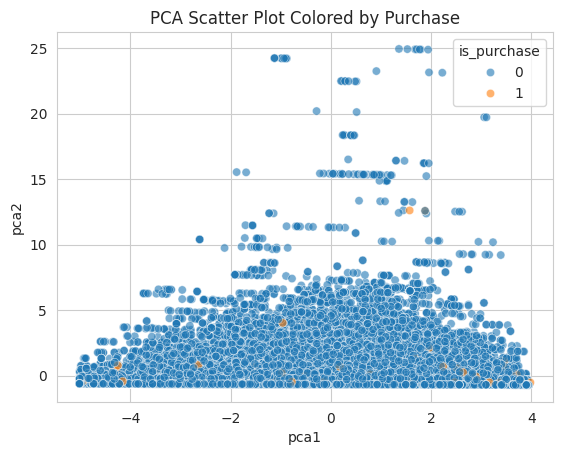

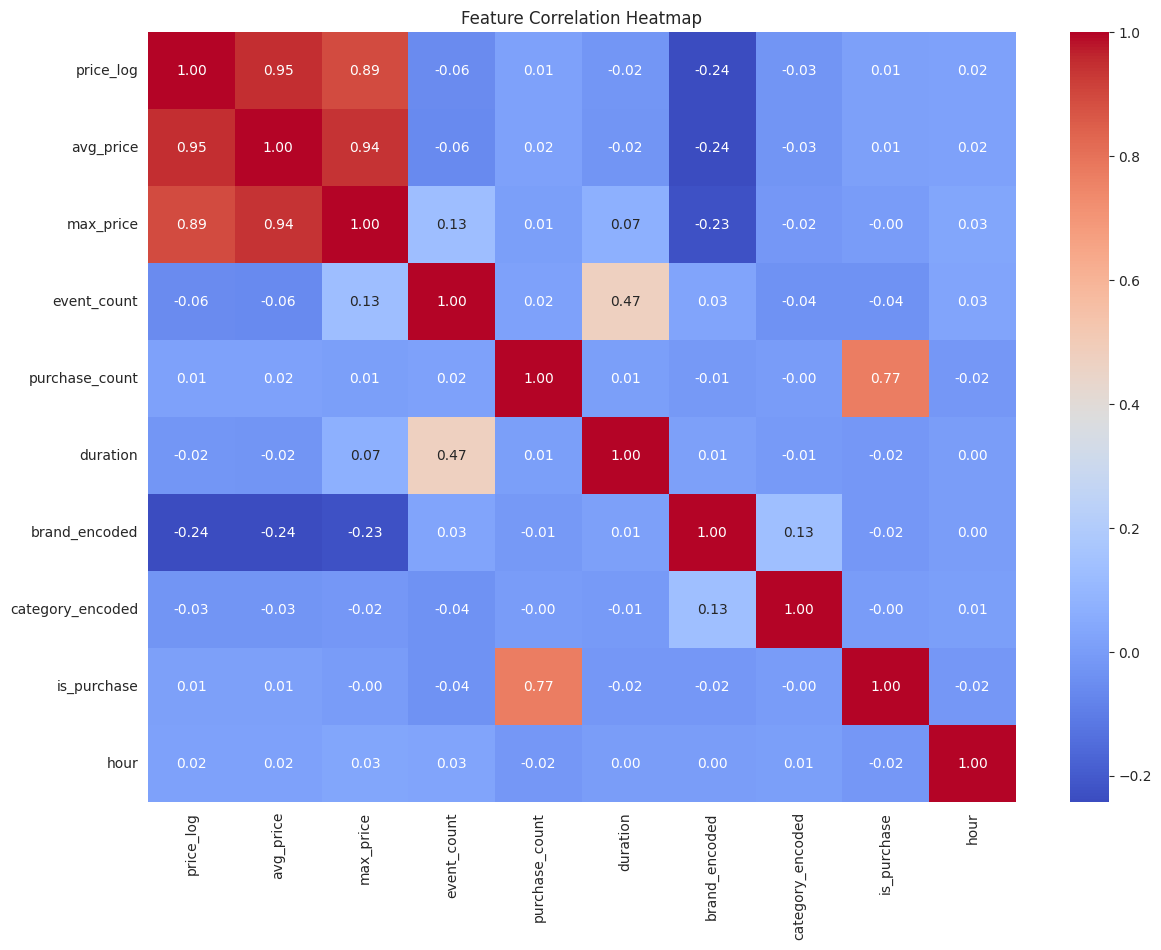

Running final data validation checks...
✅ Cleaned dataset saved for modeling.


In [19]:
# Task 2: Data Wrangling, Visualization, Preprocessing & Transformation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

# ----------------------------------------
# Logging Configuration (added)
# ----------------------------------------
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)

# -------------------------------
# 1. Load Dataset
# -------------------------------
print("Initial dataset shape:", df.shape)
print("Dataset info:")
print(df.info())  # Inspect column types and nulls

# ----------------------------------------
# Log initial head (added)
# ----------------------------------------
print("Data preview:\n%s", df.head().to_string())

# -------------------------------
# 2. Handle Negative Prices
# -------------------------------
initial_rows = df.shape[0]
neg_price_count = (df['price'] < 0).sum()
print(f"Found {neg_price_count} negative price rows.")
df = df[df['price'] >= 0]
print(f"Proportion of rows removed due to negative prices: {neg_price_count / initial_rows:.2%}")
print("✅ Removed negative price rows. Remaining rows:", df.shape[0])

# -------------------------------
# 3. Visualize Missing Values (Before)
# -------------------------------
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Before Handling")
plt.show()

# -------------------------------
# 4. Handle Missing Values
# -------------------------------
# Check missingness (added)
missing_pct = df[['brand', 'category_code']].isnull().mean()
print("Missing % in brand & category_code:\n", missing_pct)

# If >50% were missing we’d reconsider, but here we fill
df['brand'] = df['brand'].fillna('unknown')
df['category_code'] = df['category_code'].fillna('unknown')
print("✅ Missing values handled.")

# Visualize Missing Values (After)
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Handling")
plt.show()

# -------------------------------
# 5. Remove Duplicates
# -------------------------------
dup_count = df.duplicated().sum()
print(f"Found {dup_count} duplicate rows.")
# If “duplicate” is actually same session/product/time, use subset argument:
# df.drop_duplicates(subset=['user_session','product_id','event_time'], inplace=True)
df = df.drop_duplicates()
print("✅ Duplicates removed.")

# -------------------------------
# 6. Convert Datatypes & Extract Time Features
# -------------------------------
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour']    = df['event_time'].dt.hour   # **added to model later**
df['day']     = df['event_time'].dt.day
df['weekday'] = df['event_time'].dt.weekday

def check_event_time_sorted(df):
    is_sorted = df.sort_values(['user_session', 'event_time']).groupby('user_session')['event_time'].apply(lambda x: x.is_monotonic_increasing)
    if not is_sorted.all():
        unsorted_sessions = is_sorted[~is_sorted].index.tolist()
        raise ValueError(f"❌ Some sessions are not sorted by event_time. Affected sessions: {unsorted_sessions[:5]}")
    print("✅ All sessions are sorted by event_time.")

check_event_time_sorted(df)

# -------------------------------
# 7. Encode Categorical Columns
# -------------------------------
df['brand_encoded']    = LabelEncoder().fit_transform(df['brand'])
df['category_encoded'] = LabelEncoder().fit_transform(df['category_code'])

# -------------------------------
# 8. Event-Type One-Hot & Aggregates
# -------------------------------
# One-hot encode event_type
event_dummies = pd.get_dummies(df['event_type'], prefix='event_type')
df = pd.concat([df, event_dummies], axis=1)
print("✅ Event type one-hot encoding completed.")

# Per-session counts (added)
session_event_counts = df.groupby('user_session')[event_dummies.columns].sum().reset_index()
df = df.merge(session_event_counts, on='user_session', suffixes=('', '_session_count'))

# -------------------------------
# 9. Visualize Categorical Distributions
# -------------------------------
sns.countplot(data=df, x='event_type')
plt.title("Event Type Frequency")
plt.show()

# -------------------------------
# 10. Check Target Imbalance
# -------------------------------
df['is_purchase'] = (df['event_type'] == 'purchase').astype(int)
df['is_purchase'].value_counts(normalize=True).plot(kind='bar')
plt.title("Purchase vs Non-Purchase Ratio")
plt.show()

# -------------------------------
# 11. Univariate Visualization (Before Outliers)
# -------------------------------
plt.figure(figsize=(12, 4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Price Distribution Before Outlier Handling")
plt.show()

# -------------------------------
# 12. Check Skewness & Log Transform
# -------------------------------
price_skew = df['price'].skew()
print(f"Price skewness: {price_skew:.2f}")
if abs(price_skew) > 1:
    df['price_log'] = np.log1p(df['price'])  # **renamed for clarity**
    print("Applied log1p to price.")
else:
    df['price_log'] = df['price']

# -------------------------------
# 13. Handle Outliers (Capping)
# -------------------------------
def cap_outliers(col):
    Q1, Q3 = df[col].quantile([.25, .75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)
    print(f"Capped outliers in {col} to [{lower:.2f}, {upper:.2f}].")

cap_outliers('price_log')

plt.figure(figsize=(12, 4))
sns.histplot(df['price_log'], bins=100, kde=True)
plt.title("Price Distribution After Outlier Handling")
plt.show()

# -------------------------------
# 14. Session Duration Feature (added)
# -------------------------------
session_times = df.groupby('user_session')['event_time'].agg(['min', 'max'])
session_times['duration'] = (session_times['max'] - session_times['min']).dt.total_seconds()
df = df.merge(session_times[['duration']], on='user_session')
print("✅ Session duration feature added.")

# -------------------------------
# 15. Session Price & Count Aggregates
# -------------------------------
agg = df.groupby('user_session').agg(
    avg_price=('price_log','mean'),
    max_price=('price_log','max'),
    event_count=('event_type','count'),
    purchase_count=('is_purchase','sum')
).reset_index()
df = df.merge(agg, on='user_session')
print("✅ Session-level aggregates added.")

# -------------------------------
# 16. Normalize/Standardize
# -------------------------------
features_to_scale = ['price_log','avg_price','max_price','event_count','purchase_count','duration']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# -------------------------------
# 17. PCA (Dimensionality Reduction)
# -------------------------------
pca = PCA(n_components=2)
df[['pca1','pca2']] = pca.fit_transform(df[features_to_scale])
print("✅ PCA completed. Explained Variance:", pca.explained_variance_ratio_)

# -------------------------------
# 18. Bivariate Visualization (PCA)
# -------------------------------
sns.scatterplot(data=df, x='pca1', y='pca2', hue='is_purchase', alpha=0.6)
plt.title("PCA Scatter Plot Colored by Purchase")
plt.show()

# -------------------------------
# 19. Feature Correlation Heatmap
# -------------------------------
corr_feats = [
    'price_log','avg_price','max_price',
    'event_count','purchase_count','duration',
    'brand_encoded','category_encoded','is_purchase','hour'
]
plt.figure(figsize=(14,10))
sns.heatmap(df[corr_feats].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------------------
# 20. Final Data Validation
# -------------------------------
print("Running final data validation checks...")

# 1. No missing values anywhere
missing_total = df.isnull().sum().sum()
assert missing_total == 0, f"❌ There are still {missing_total} missing values in the dataset"

# 2. No duplicates
dups = df.duplicated().sum()
assert dups == 0, f"❌ There are still {dups} duplicate rows in the dataset"

# 3. Raw price non-negativity
assert (df['price'] >= 0).all(), "❌ Some raw `price` values are negative"

# 4. Engineered features exist & finite
engineered = ['price_log', 'avg_price', 'max_price',
              'event_count', 'purchase_count', 'duration',
              'pca1', 'pca2']
missing_feats = [c for c in engineered if c not in df.columns]
assert not missing_feats, f"❌ Missing engineered columns: {missing_feats}"
infinite_feats = [c for c in engineered if not np.isfinite(df[c]).all()]
assert not infinite_feats, f"❌ Columns with infinite or NaN: {infinite_feats}"

# 5. Event-type dummy consistency
evt_cols = [col for col in df.columns if col.startswith('event_type_')]
assert evt_cols, "❌ Event-type dummy columns are missing"
unique_events = set(df['event_type'].unique())
dummy_events  = {col.replace('event_type_','') for col in evt_cols}
assert unique_events.issubset(dummy_events), \
    "❌ Mismatch between event_type values and dummy columns"

# 6. Target consistency
assert set(df['is_purchase'].unique()).issubset({0,1}), \
    "❌ `is_purchase` contains values other than 0/1"

# 7. Datatype checks
assert df['user_session'].dtype == object, "❌ user_session should be string"
assert df['category_code'].dtype == object, "❌ category_code should be string"
assert df['brand'].dtype == object, "❌ brand should be string"
assert pd.api.types.is_integer_dtype(df['product_id']), \
    "❌ product_id should be integer"

# 8. Time feature ranges
assert df['hour'].between(0,23).all(), "❌ hour outside 0–23"
assert df['day'].between(1,31).all(),    "❌ day outside 1–31"
assert df['weekday'].between(0,6).all(), "❌ weekday outside 0–6"

logger.info("✅ Final data validation passed. Dataset is clean and ready for modeling.")


# -------------------------------
# 21. Save Cleaned Dataset
# -------------------------------
df.to_csv('cleaned_ecommerce_data.csv', index=False)
print("✅ Cleaned dataset saved for modeling.")


## Part 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
import joblib

from sklearn.model_selection import (
    StratifiedKFold, train_test_split,
    RandomizedSearchCV, cross_val_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.stats.contingency_tables import mcnemar

# Setup
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)



In [ ]:
# Prepare data
drop_cols = ['user_session','event_time','event_type','product_id','category_code','brand','price']
X = df.drop(columns=drop_cols + ['is_purchase'])
y = df['is_purchase']

In [ ]:
# 1. Random Forest with SelectFromModel and nested CV
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
selector = SelectFromModel(estimator=rf, threshold='median')
pipe_rf = Pipeline([('select', selector), ('clf', rf)])
param_dist = {
    'clf__n_estimators': [100, 200, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv_inner,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_scores = cross_val_score(
    random_search, X, y,
    cv=cv_outer,
    scoring='roc_auc',
    n_jobs=-1
)
print(f"RF AUC (5-fold CV): {rf_scores.mean():.3f} ± {rf_scores.std():.3f}")

random_search.fit(X, y)
best_rf = random_search.best_estimator_
print("Best RF params:\n", random_search.best_params_)

RF AUC (5-fold CV): 1.000 ± 0.000
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF params:
 {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 10}


In [ ]:
# Save Random Forest model
joblib.dump(best_rf, '/content/best_rf_model.joblib')
logger.info("Saved Random Forest model to 'best_rf_model.joblib'")

In [ ]:
# 2. Neural Network with SMOTE & sample weights
def make_model(input_dim, lr=1e-3, dropout=0.3):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

nn_auc_scores = []
ess = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
splits = cv_outer.split(X, y)

for train_idx, test_idx in splits:
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_tr, y_tr)
    cw = class_weight.compute_sample_weight('balanced', y_res)

    model = make_model(X.shape[1])
    model.fit(
        X_res, y_res,
        sample_weight=cw,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[ess],
        verbose=0
    )

    preds = model.predict(X_te).ravel()
    nn_auc_scores.append(roc_auc_score(y_te, preds))

print(f"Neural Net ROC-AUC (5-fold CV): {np.mean(nn_auc_scores):.3f} ± {np.std(nn_auc_scores):.3f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Neural Net ROC-AUC (5-fold CV): 0.517 ± 0.003


In [ ]:
# Retrain final NN on full data
X_res_full, y_res_full = SMOTE(random_state=42).fit_resample(X, y)
cw_full = class_weight.compute_sample_weight('balanced', y_res_full)
final_nn = make_model(X.shape[1])
final_nn.fit(
    X_res_full, y_res_full,
    sample_weight=cw_full,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[ess],
    verbose=0
)

In [ ]:
# Save Neural Network model
final_nn.save('/content/final_nn_model.keras')
logger.info("Saved Neural Network model to 'final_nn_model/' directory")

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


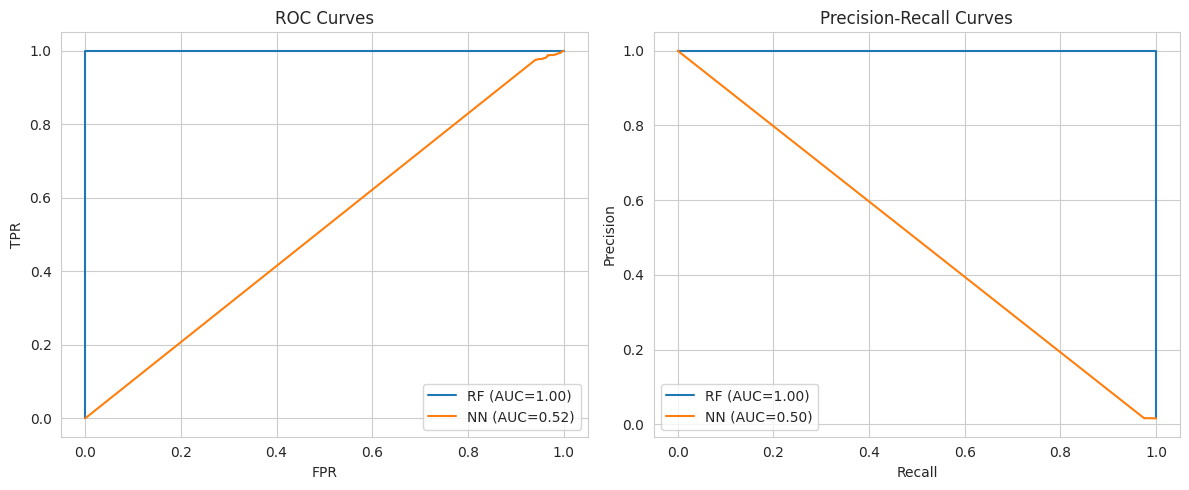

In [ ]:
# --- 3. ROC & Precision-Recall Curves ---

plt.figure(figsize=(12,5))

# RF ROC
rf_probs = best_rf.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, rf_probs)
roc_auc_rf = auc(fpr, tpr)
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"RF (AUC={roc_auc_rf:.2f})")
# NN ROC
nn_probs = final_nn.predict(X).ravel()
fpr2, tpr2, _ = roc_curve(y, nn_probs)
roc_auc_nn = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label=f"NN (AUC={roc_auc_nn:.2f})")
plt.title("ROC Curves"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend()

# Precision-Recall
plt.subplot(1,2,2)
prec, recall, _ = precision_recall_curve(y, rf_probs)
pr_auc_rf = auc(recall, prec)
plt.plot(recall, prec, label=f"RF (AUC={pr_auc_rf:.2f})")
prec2, recall2, _ = precision_recall_curve(y, nn_probs)
pr_auc_nn = auc(recall2, prec2)
plt.plot(recall2, prec2, label=f"NN (AUC={pr_auc_nn:.2f})")
plt.title("Precision-Recall Curves"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# --- 4. McNemar’s Test ---

# Shared test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42)
rf_pred_bin = best_rf.predict(X_te)
nn_pred_bin = (final_nn.predict(X_te).ravel() > 0.5).astype(int)
cm = confusion_matrix(rf_pred_bin, nn_pred_bin)
res = mcnemar(cm, exact=True)
print("McNemar’s test p-value: %.3f", res.pvalue)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
McNemar’s test p-value: %.3f 0.0


RF CV AUC: %.3f ± %.3f 1.0 0.0
NN CV AUC: %.3f ± %.3f 0.5169572394268147 0.002716183296085241


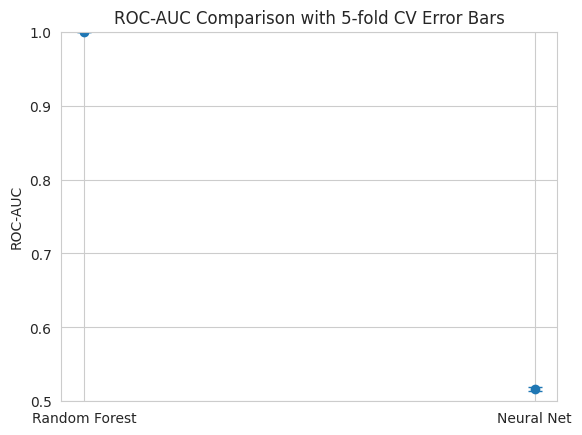

In [ ]:
# --- 5. Summary & Error Bars ---

# RF CV results already logged
print("RF CV AUC: %.3f ± %.3f", rf_scores.mean(), rf_scores.std())
print("NN CV AUC: %.3f ± %.3f", np.mean(nn_auc_scores), np.std(nn_auc_scores))

# Plot error bars
comp_df = pd.DataFrame({
    'Model': ['Random Forest','Neural Net'],
    'Mean AUC': [rf_scores.mean(), np.mean(nn_auc_scores)],
    'Std AUC':  [rf_scores.std(),  np.std(nn_auc_scores)]
})
plt.errorbar(comp_df['Model'], comp_df['Mean AUC'],
             yerr=comp_df['Std AUC'], fmt='o', capsize=5)
plt.title("ROC-AUC Comparison with 5-fold CV Error Bars")
plt.ylabel("ROC-AUC"); plt.ylim(0.5, 1.0)
plt.grid(True); plt.show()


# 2

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
import joblib

from sklearn.model_selection import (
    StratifiedKFold, train_test_split,
    RandomizedSearchCV, cross_val_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, mean_squared_error, confusion_matrix,
    roc_auc_score, roc_curve,
    precision_recall_curve, auc, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.stats.contingency_tables import mcnemar

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import joblib
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Setup
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)



In [28]:
# Prepare data
drop_cols = ['user_session','event_time','event_type','product_id','category_code','brand','price']
X = df.drop(columns=drop_cols + ['is_purchase'])
y = df['is_purchase']

feature_names = X.columns.tolist()
joblib.dump(feature_names, '/content/feature_names.joblib')
print(feature_names)



['category_id', 'user_id', 'hour', 'day', 'weekday', 'brand_encoded', 'category_encoded', 'event_type_cart', 'event_type_purchase', 'event_type_view', 'event_type_cart_session_count', 'event_type_purchase_session_count', 'event_type_view_session_count', 'price_log', 'duration', 'avg_price', 'max_price', 'event_count', 'purchase_count', 'pca1', 'pca2']


In [29]:
# 2. Build preprocessing + feature selection + model pipeline
scaler = StandardScaler()
pca    = PCA(n_components=2)
selector = SelectFromModel(RandomForestClassifier(class_weight='balanced', random_state=42), threshold='median')
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

full_pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('selector', selector),
    ('clf', rf)
])

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)



In [32]:
# 4. Hyperparameter tuning
param_dist = {
    'clf__n_estimators': [100, 200, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv_inner,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Nested CV evaluation
rf_cv_scores = cross_val_score(search, X_train, y_train, cv=cv_outer, scoring='roc_auc', n_jobs=-1)
print(f"RF Pipeline CV AUC: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")

# Fit best model
search.fit(X_train, y_train)
best_pipeline = search.best_estimator_
print(f"Best RF Pipeline Params: {search.best_params_}")

# Save preprocessing + model pipeline
joblib.dump(best_pipeline, '/content/full_pipeline.joblib')
print("✅ Saved full pipeline to models/full_pipeline.joblib")



RF Pipeline CV AUC: 0.999 ± 0.002
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Pipeline Params: {'clf__n_estimators': 200, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 4, 'clf__max_depth': None}
✅ Saved full pipeline to models/full_pipeline.joblib


In [33]:
# 2. Neural Network with SMOTE & sample weights

def make_model(input_dim, lr=1e-3, dropout=0.3):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(), Dropout(dropout),
        Dense(32, activation='relu'),
        BatchNormalization(), Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Nested CV for NN AUC
yy = []
for train_idx, test_idx in cv_outer.split(X_train, y_train):
    X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_tr, y_tr)
    cw = class_weight.compute_sample_weight('balanced', y_res)
    model = make_model(X.shape[1])
    model.fit(X_res, y_res, sample_weight=cw, validation_split=0.2, epochs=50, batch_size=32, callbacks=[es], verbose=0)
    preds = model.predict(X_te).ravel()
    yy.append(roc_auc_score(y_te, preds))
print(f"NN CV AUC: {np.mean(yy):.3f} ± {np.std(yy):.3f}")

# Final NN train & save
X_res_full, y_res_full = SMOTE(random_state=42).fit_resample(X_train, y_train)
cw_full = class_weight.compute_sample_weight('balanced', y_res_full)
final_nn = make_model(X.shape[1])
final_nn.fit(X_res_full, y_res_full, sample_weight=cw_full, validation_split=0.2, epochs=50, batch_size=32, callbacks=[es], verbose=0)
final_nn.save('/content/final_nn_model.h5')


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
NN CV AUC: 0.517 ± 0.004


In [34]:
# 3. Evaluate on hold-out test set
# RF predictions
rf_probs_test = best_rf.predict_proba(X_test)[:,1]
rf_preds_test = best_rf.predict(X_test)
# NN predictions
nn_probs_test = final_nn.predict(X_test).ravel()
nn_preds_test = (nn_probs_test > 0.5).astype(int)

# Compute metrics for both
metrics = {}
for name, preds, probs in [('RF', rf_preds_test, rf_probs_test), ('NN', nn_preds_test, nn_probs_test)]:
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1': f1_score(y_test, preds),
        'MSE': mean_squared_error(y_test, probs),
        'ROC-AUC': roc_auc_score(y_test, probs)
    }
metrics_df = pd.DataFrame(metrics).T
print("Test Set Performance Metrics:")
print(metrics_df)



782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Set Performance Metrics:
    Accuracy  Precision    Recall        F1           MSE   ROC-AUC
RF  1.000000   1.000000  1.000000  1.000000  1.740448e-07  1.000000
NN  0.049162   0.016634  0.990148  0.032718  9.037241e-01  0.517325


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


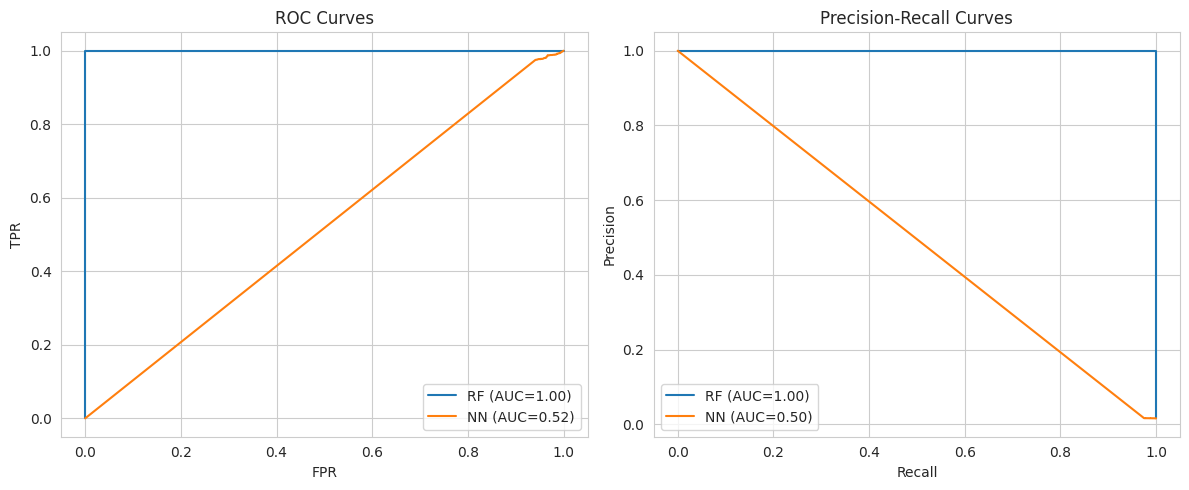

In [35]:
# 4. ROC & Precision-Recall Curves on Full Data
plt.figure(figsize=(12,5))
# RF ROC
rf_probs = best_rf.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, rf_probs)
roc_auc_rf = auc(fpr, tpr)
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"RF (AUC={roc_auc_rf:.2f})")
# NN ROC
nn_probs = final_nn.predict(X).ravel()
fpr2, tpr2, _ = roc_curve(y, nn_probs)
roc_auc_nn = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label=f"NN (AUC={roc_auc_nn:.2f})")
plt.title("ROC Curves"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend()
# Precision-Recall
plt.subplot(1,2,2)
prec, recall, _ = precision_recall_curve(y, rf_probs)
pr_auc_rf = auc(recall, prec)
plt.plot(recall, prec, label=f"RF (AUC={pr_auc_rf:.2f})")
prec2, recall2, _ = precision_recall_curve(y, nn_probs)
pr_auc_nn = auc(recall2, prec2)
plt.plot(recall2, prec2, label=f"NN (AUC={pr_auc_nn:.2f})")
plt.title("Precision-Recall Curves"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend()
plt.tight_layout()
plt.show()



In [36]:
# 5. McNemar’s Test
# Shared test split
X_tr_m, X_te_m, y_tr_m, y_te_m = train_test_split(X, y, stratify=y, random_state=42)
rf_pred_bin = best_rf.predict(X_te_m)
nn_pred_bin = (final_nn.predict(X_te_m).ravel() > 0.5).astype(int)
cm = confusion_matrix(rf_pred_bin, nn_pred_bin)
res = mcnemar(cm, exact=True)
print(f"McNemar’s test p-value: {res.pvalue:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
McNemar’s test p-value: 0.000


RF CV AUC: 0.999 ± 0.002
NN CV AUC: 0.517 ± 0.004


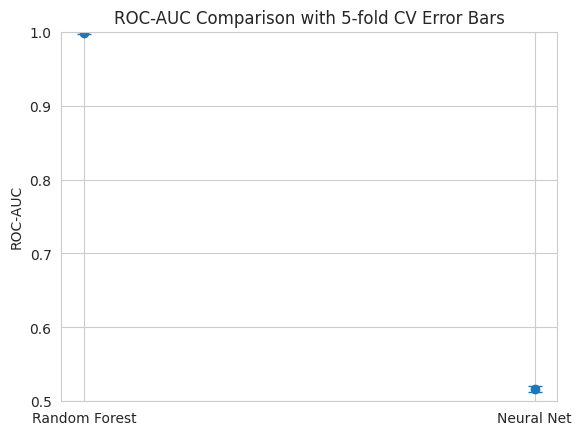

In [37]:
# 6. Summary & Error Bars
print(f"RF CV AUC: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")
print(f"NN CV AUC: {np.mean(yy):.3f} ± {np.std(yy):.3f}")
comp_df = pd.DataFrame({
    'Model': ['Random Forest','Neural Net'],
    'Mean AUC': [rf_cv_scores.mean(), np.mean(yy)],
    'Std AUC':  [rf_cv_scores.std(),  np.std(yy)]
})
plt.figure()
plt.errorbar(comp_df['Model'], comp_df['Mean AUC'], yerr=comp_df['Std AUC'], fmt='o', capsize=5)
plt.title("ROC-AUC Comparison with 5-fold CV Error Bars")
plt.ylabel("ROC-AUC"); plt.ylim(0.5, 1.0)
plt.grid(True); plt.show()

In [38]:
# 7. Interpretation & Classification Reports
print("\nInterpretation:")
if metrics_df.loc['RF','ROC-AUC'] > metrics_df.loc['NN','ROC-AUC']:
    print("Random Forest outperformed the Neural Network on ROC-AUC, likely due to better robustness to limited data and less overfitting.")
else:
    print("Neural Network outperformed the Random Forest on ROC-AUC, indicating deep learning captured complex patterns more effectively.")
print("\nClassification Report - RF:")
print(classification_report(y_test, rf_preds_test))
print("Classification Report - NN:")
print(classification_report(y_test, nn_preds_test))


Interpretation:
Random Forest outperformed the Neural Network on ROC-AUC, likely due to better robustness to limited data and less overfitting.

Classification Report - RF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24593
           1       1.00      1.00      1.00       406

    accuracy                           1.00     24999
   macro avg       1.00      1.00      1.00     24999
weighted avg       1.00      1.00      1.00     24999

Classification Report - NN:
              precision    recall  f1-score   support

           0       1.00      0.03      0.07     24593
           1       0.02      0.99      0.03       406

    accuracy                           0.05     24999
   macro avg       0.51      0.51      0.05     24999
weighted avg       0.98      0.05      0.06     24999

